Author: [Sebastià Agramunt Puig](https://github.com/sebastiaagramunt) for [OpenMined](https://www.openmined.org/) Privacy ML Series course.

# Exercise 1: Encrypt an image with AES and ECB mode

In this exercice we want to encrypt an image of Tux, the famous penguin from Linux using the AES algorithm and the Electronic Code Book mode.

<img src="img/ECB_mode.png" style="width:1100px"/>

## Plotting the image of Tux

The file is on `../data/tux.png`. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_array(img: np.ndarray, size = (5, 5)):
    plt.clf()
    fig = plt.figure()
    fig.set_size_inches(size[0], size[1])
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap='Greys')
    plt.show()

Shape of image: (1449, 1200, 4)
Type of image: uint8


<Figure size 432x288 with 0 Axes>

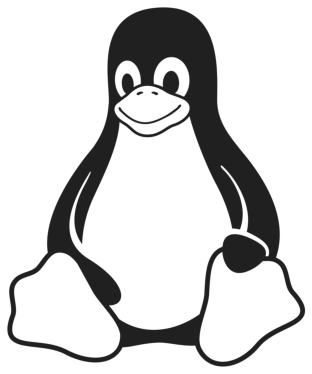

In [2]:
# open image with PIL.Image
from PIL import Image
img = Image.open("../data/tux.png")

# convert image to numpy ndarray
img = np.array(img)

# plot shape and type of pixels
print(f"Shape of image: {img.shape}")
print(f"Type of image: {img.dtype}")
# show plot of tux!
plot_array(img)

In [3]:
# save the shape of the image
shape = (img.shape[0], img.shape[1], img.shape[2])

## Converting the image pixels to bytes

In this section you need to convert the `np.array` of the image to an array of bytes that will be our plaintext to encrypt

In [4]:
# flatten the image
img_flat = img.flatten()

# recall that all pixels are of type unsigned integer of 8 bits (uint8), that's a byte! 
img_bytes = bytes([x for x in img_flat])

# print the first 10 bytes
print(img_bytes[1000:1050])

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


## Padding the message (image)

We want to use AES with a block size of 16 bytes, let's see if we need to pad the image

In [5]:
# check if we need to pad the message (image), if so use PKCS7 from cryptography library
block_size = 16
print(f"Bytes remainder {len(img_bytes)%block_size}")

Bytes remainder 0


One job less! We don't need to pad the image as it is already a multiple of 16!.

## Declare the AES in ECB mode

In [28]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os

# draw 32 random bytes for secret key
secret_key = os.urandom(32)

# define cipher with AES algorithm and ECB mode
cipher = Cipher(algorithms.AES(secret_key), modes.ECB(), backend=default_backend())

# define encryptor and decryptor
encryptor = cipher.encryptor()
decryptor = cipher.decryptor()

In [29]:
# encrypt the image
ctx = encryptor.update(img_bytes) + encryptor.finalize()

In [30]:
print(ctx[0:50])

b'\x92lW@\x04\x86\x7f\xa4\x83\x1d\xd4\x00\xfa{\xe4\xa6\x92lW@\x04\x86\x7f\xa4\x83\x1d\xd4\x00\xfa{\xe4\xa6\x92lW@\x04\x86\x7f\xa4\x83\x1d\xd4\x00\xfa{\xe4\xa6\x92l'


## Plot the ciphertext

<Figure size 432x288 with 0 Axes>

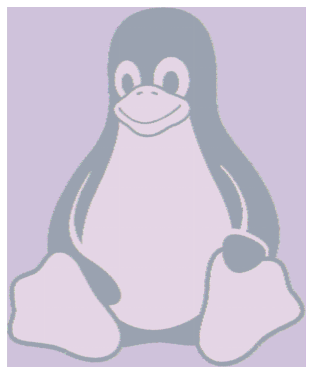

In [31]:
# reshape the ciphertext to the oringial shape of the image
# WHEN WE ITERATE THROUGH A BYTES STRING WE GET INTS
ctx_flat_int = [x for x in ctx]
ctx_img = np.array(ctx_flat_int).reshape(shape[0], shape[1], shape[2])

# plot ciphertext of Tux!
plot_array(ctx_img)

Well, if an eavesdroper sees this, he certainly knows that this is Tux!. Let's decrypt this and recover the original image 

## Recover the original image

<Figure size 432x288 with 0 Axes>

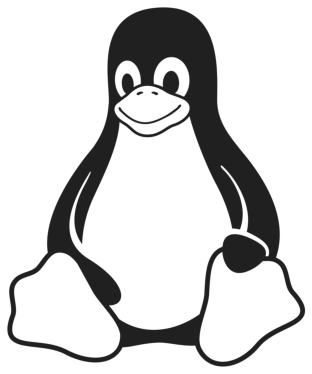

In [32]:
# get the plaintext in bytes
pltx = decryptor.update(ctx)

# reshape the plaintext to get the pixels
pltx_img = np.array([x for x in pltx], dtype=np.uint8).reshape(shape[0], shape[1], shape[2])

# plot image
plot_array(pltx_img)

# Exercise 2: Encrypt an image with AES and CBC mode

<img src="img/CBC_mode.png" style="width:1100px"/>

In [37]:
# draw secret key of 32 bytes
secret_key = os.urandom(32)

# draw initialization vector 16 bytes
iv = os.urandom(16)

# build the cipher using CBC
cipher = Cipher(algorithms.AES(secret_key), modes.CBC(iv), backend=default_backend())

encryptor = cipher.encryptor()
decryptor = cipher.decryptor()

In [38]:
# encrypt image
ctx = encryptor.update(img_bytes) + encryptor.finalize()

In [39]:
print(ctx[0:100])

b'\x8b\xcc\x82\xaa\x97\xda\x16\xc0\x889\x80\x81\xd4\x88\xb2C~\x0c=\x86\x18{\x0f1G\xc8\xd6D\x9a\xf1\xae\xf1\xd9\xe5\x81\xca\xb0\x92\xca\xfd\x116n\xe4O\x8b\xaf\xa8\xae\x92\xc9\xd1~\x82c\xfa\xe8T\x80\xa6\x86\xb9\x01D\x16\xd2\x87\x03\xf1\xd1,"\x86>\x1c\xdf\xc7\xd3\x10]\xe0\xf9r\xc4Ij:\xc9s\xc90\xd0e7\xbf+\xba\xbb\xf1\xf3'


<Figure size 432x288 with 0 Axes>

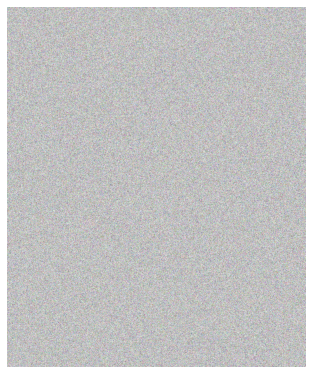

In [40]:
# reshape the ciphertext to the oringial shape of the image and plot
ctx_flat_int = [x for x in ctx]
ctx_img = np.array(ctx_flat_int).reshape(shape[0], shape[1], shape[2])

# plot ciphertext of Tux!
plot_array(ctx_img)

# Conclusions

ECB mode is not a good mode to operate as every byte in the plaintext is converted to the same byte in the ciphertext and therefore it won't work on images. 